In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import threading

In [7]:
TRAIN_DIR = r"C:\Users\ASUS ROG\Downloads\archive (1)\DATASET\DATASET\TRAIN"
TEST_DIR = "DATASET/TEST"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32


In [8]:
categories = ["organic", "plastic"]
image_counts = {category: len(os.listdir(os.path.join(TRAIN_DIR, category))) for category in categories}

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_19380\3466405871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")


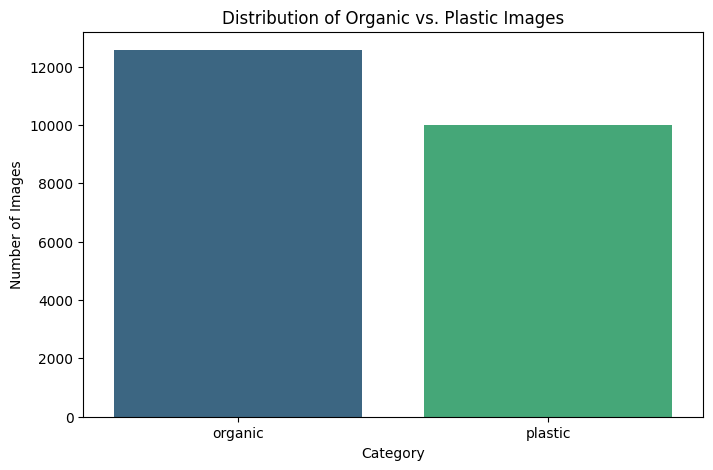

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Organic vs. Plastic Images")
plt.show()

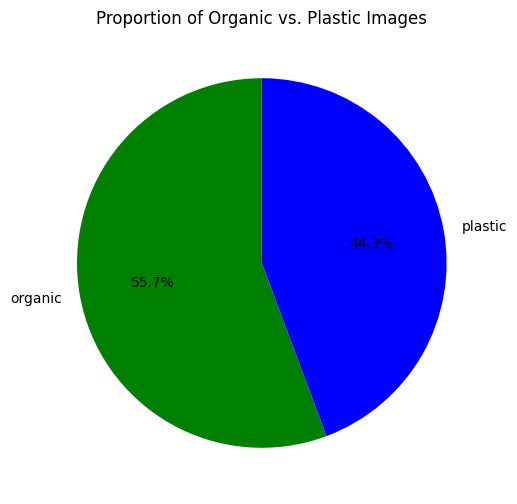

In [10]:
# Pie Chart: Proportion of each class
plt.figure(figsize=(6, 6))
plt.pie(image_counts.values(), labels=image_counts.keys(), autopct='%1.1f%%', colors=["green", "blue"], startangle=90)
plt.title("Proportion of Organic vs. Plastic Images")
plt.show()

In [11]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', subset='training')
val_generator = datagen.flow_from_directory(TRAIN_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', subset='validation')

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
epochs = 10
model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10


565/565 [==============================] - 203s 357ms/step - loss: 0.4280 - accuracy: 0.8112 - val_loss: 0.3936 - val_accuracy: 0.8198
Epoch 2/10
565/565 [==============================] - 168s 297ms/step - loss: 0.3574 - accuracy: 0.8478 - val_loss: 0.3876 - val_accuracy: 0.8220
Epoch 3/10
565/565 [==============================] - 161s 284ms/step - loss: 0.3154 - accuracy: 0.8683 - val_loss: 0.3596 - val_accuracy: 0.8500
Epoch 4/10
565/565 [==============================] - 146s 259ms/step - loss: 0.2885 - accuracy: 0.8825 - val_loss: 0.3891 - val_accuracy: 0.8269
Epoch 5/10
565/565 [==============================] - 157s 278ms/step - loss: 0.2467 - accuracy: 0.9003 - val_loss: 0.3535 - val_accuracy: 0.8573
Epoch 6/10
565/565 [==============================] - 157s 278ms/step - loss: 0.2003 - accuracy: 0.9216 - val_loss: 0.5326 - val_accuracy: 0.8054
Epoch 7/10
565/565 [==============================] - 155s 274ms/step - loss: 0.1440 - accuracy: 0.9448 - val_loss: 0.5478

In [15]:
model.save("waste_classification_model.h5")

c:\Users\ASUS ROG\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
